In [388]:
import os
import pandas as pd
df = pd.read_csv(r"C:\Users\jmich\Google\file1.csv", dtype="string")
DIR_PATH = os.path.dirname('file1.csv')
FILE_PATH = os.path.join(DIR_PATH, "scripts.csv")

In [389]:
tfidf_vect = TfidfVectorizer()

In [390]:
from sklearn.model_selection import train_test_split

train_df, test = train_test_split(df, test_size=0.2, random_state=0)

In [391]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = train_df
vectorizer= TfidfVectorizer(analyzer='word', stop_words='english', 
                              token_pattern='[A-Za-z][\w\-]*', max_df=0.25)

X = vectorizer.fit_transform(corpus)

print(X.shape)

(9, 9)


In [392]:
X = vectorizer.fit_transform(df[1:625])

In [393]:
df= df.dropna()

In [394]:
from langdetect import detect
def detect_lang(txt):
    try:
        return detect(txt)
    except:
        return np.nan
df.head(3)

df_head = ["index", "Narrative", "Fakes", "Disinfo_cases_en", "Date", "Countries","Media","Link","Debunking"]
df.head(0)

,id,Narrative,Fakes,Disinfo_cases_en,Date,Countries,Media,Link,Debunking


In [395]:
#Preprocesing,
#tokenizer

In [396]:
df.dropna()

,id,Narrative,Fakes,Disinfo_cases_en,Date,Countries,Media,Link,Debunking
0,564,Ukraine is conducting an aggressive policy,Kyiv ignores fulfillment ot the Minsk Agreements,Kyiv forces continue to bomb the territories o...,21/2/2022,Italy,SNA.IT,https://it.sputniknews.com/20220221/le-forze-d...,<p>The Minsk agreements were concluded as a re...
1,2,Maidan in 2014 was a coup d'état,Maidan led to the separation of Donetsk and Lu...,"After the Maidan putsch in April 2014, Kyiv se...",10/03/2021,Germany,Antispiegel,https://www.anti-spiegel.ru/2021/krieg-im-donb...,<p>Not the Revolution of Dignity but Russian a...
2,3,Maidan in 2014 was a coup d'état,Maidan led to the separation of Donetsk and Lu...,Because of the Maidan coup and the thousands o...,15/01/2022,Germany,RT.DE,https://de.rt.com/meinung/129862-lebkuchenhexe...,<p>Not the Revolution of Dignity but Russian a...
3,4,Maidan in 2014 was a coup d'état,Maidan led to the separation of Donetsk and Lu...,A civil war has been raging there since a coup...,23/04/2021,Germany,wsws.org,https://www.wsws.org/de/articles/2021/04/23/uk...,<p>Not the Revolution of Dignity but Russian a...
4,5,Maidan in 2014 was a coup d'état,Maidan led to the separation of Donetsk and Lu...,"Of course, Biden knows who initiated the 2014 ...",19/12/2021,Germany,RT.DE,https://de.rt.com/meinung/128478-russland-und-...,<p>Not the Revolution of Dignity but Russian a...
...,...,...,...,...,...,...,...,...,...
618,619,Russia is not involved in MH17 crash; Ukraine ...,Russia is not involved in MH17 crash; Ukraine ...,US intelligence analysts had already concluded...,19/08/2014,Italy,Controinformazione,https://www.controinformazione.info/gli-accord...,"<p>The Malaysian Boeing over Donbass <a href=""..."
619,40,Maidan in 2014 was a coup d'état,Maidan in 2014 was a coup d'état,in Ukraine we have witnessed a real coup d'état,18/03/2014,Italy,Viva.it,http://www.vita.it/it/article/2014/03/18/cosa-...,<p>Allegations of an alleged coup d’etat in th...
620,400,Russia is not an agressor towards Ukraine,Russia did not occupy Crimea. It was a reunifi...,"In Sunday's referendum, 96.6 percent of Crimes...",17/3/2014,Italy,avvenire.it,https://www.avvenire.it/mondo/pagine/referendu...,<p>The decision to hold a so-called “referendu...
621,23,Maidan in 2014 was a coup d'état,Maidan was organised or supported by other cou...,"Ukraine, how a 'modern' coup is made",10/03/2014,Italy,ilfattoquotidiano.it,https://www.ilfattoquotidiano.it/2014/03/10/uc...,<p>Such statements are unfounded. The Ukrainia...


In [397]:
text = df["Disinfo_cases_en"]
result = text.to_string(index = False)

print(result)

Kyiv forces continue to bomb the territories of...
After the Maidan putsch in April 2014, Kyiv sen...
Because of the Maidan coup and the thousands of...
A civil war has been raging there since a coup ...
Of course, Biden knows who initiated the 2014 c...
The Ukrainian authorities launched a military o...
After the putsch on the Maidan in 2014, that wa...
The situation in the Donbas has worsened in rec...
Tension is skyrocketing in the self-proclaimed ...
With the situation in eastern Ukraine worsening...
Russia's actions in Crimea and the Donbas regio...
Nuland was the driving force behind a coup befo...
Vladimir Putin likened the events to the Wester...
And this despite the fact that it is the United...
Because although Moscow (also in the Ukraine cr...
Earlier this Sunday, the self-proclaimed Donets...
Previously, the LNR forces had claimed that the...
Sternenko rose to prominence politically as a r...
As a result of the massacre on the Maidan, abou...
The current problem only began 

In [398]:
from nltk.tokenize import sent_tokenize, word_tokenize
word_tokenize(result)

['Kyiv',
 'forces',
 'continue',
 'to',
 'bomb',
 'the',
 'territories',
 'of',
 '...',
 'After',
 'the',
 'Maidan',
 'putsch',
 'in',
 'April',
 '2014',
 ',',
 'Kyiv',
 'sen',
 '...',
 'Because',
 'of',
 'the',
 'Maidan',
 'coup',
 'and',
 'the',
 'thousands',
 'of',
 '...',
 'A',
 'civil',
 'war',
 'has',
 'been',
 'raging',
 'there',
 'since',
 'a',
 'coup',
 '...',
 'Of',
 'course',
 ',',
 'Biden',
 'knows',
 'who',
 'initiated',
 'the',
 '2014',
 'c',
 '...',
 'The',
 'Ukrainian',
 'authorities',
 'launched',
 'a',
 'military',
 'o',
 '...',
 'After',
 'the',
 'putsch',
 'on',
 'the',
 'Maidan',
 'in',
 '2014',
 ',',
 'that',
 'wa',
 '...',
 'The',
 'situation',
 'in',
 'the',
 'Donbas',
 'has',
 'worsened',
 'in',
 'rec',
 '...',
 'Tension',
 'is',
 'skyrocketing',
 'in',
 'the',
 'self-proclaimed',
 '...',
 'With',
 'the',
 'situation',
 'in',
 'eastern',
 'Ukraine',
 'worsening',
 '...',
 'Russia',
 "'s",
 'actions',
 'in',
 'Crimea',
 'and',
 'the',
 'Donbas',
 'regio',
 '...'

In [399]:
type(result)

str

In [400]:
#stopwords

In [401]:
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jmich\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [402]:
lista = ' '.join([str(elem) for elem in filtered_sentence])
 
print(lista)

Kyiv forces continue bomb territories ... After Maidan putsch April 2014 , Kyiv sen ... Because Maidan coup thousands ... A civil war raging since coup ... Of course , Biden knows initiated 2014 c ... The Ukrainian authorities launched military ... After putsch Maidan 2014 , wa ... The situation Donbas worsened rec ... Tension skyrocketing self-proclaimed ... With situation eastern Ukraine worsening ... Russia 's actions Crimea Donbas regio ... Nuland driving force behind coup befo ... Vladimir Putin likened events Wester ... And despite fact United ... Because although Moscow ( also Ukraine cr ... Earlier Sunday , self-proclaimed Donets ... Previously , LNR forces claimed ... Sternenko rose prominence politically r ... As result massacre Maidan , abou ... The current problem began US ins ... As reported , Ukrainian armed forces fired ... At time , Stoltenberg admitted ... Russia ruling hysteria arou ... After months denying involvement ... Since Maidan putsch Ukraine 2013/2014 ... The

In [403]:
example_sent = lista
type(lista)

str

In [404]:
stop_words = set(stopwords.words('english'))
  
word_tokens = word_tokenize(example_sent)
# converts the words in word_tokens to lower case and then checks whether 
#they are present in stop_words or not
filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
#with no lower case conversion
filtered_sentence = []
  
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)
  
print(word_tokens)
print(filtered_sentence)

['Kyiv', 'forces', 'continue', 'bomb', 'territories', '...', 'After', 'Maidan', 'putsch', 'April', '2014', ',', 'Kyiv', 'sen', '...', 'Because', 'Maidan', 'coup', 'thousands', '...', 'A', 'civil', 'war', 'raging', 'since', 'coup', '...', 'Of', 'course', ',', 'Biden', 'knows', 'initiated', '2014', 'c', '...', 'The', 'Ukrainian', 'authorities', 'launched', 'military', '...', 'After', 'putsch', 'Maidan', '2014', ',', 'wa', '...', 'The', 'situation', 'Donbas', 'worsened', 'rec', '...', 'Tension', 'skyrocketing', 'self-proclaimed', '...', 'With', 'situation', 'eastern', 'Ukraine', 'worsening', '...', 'Russia', "'s", 'actions', 'Crimea', 'Donbas', 'regio', '...', 'Nuland', 'driving', 'force', 'behind', 'coup', 'befo', '...', 'Vladimir', 'Putin', 'likened', 'events', 'Wester', '...', 'And', 'despite', 'fact', 'United', '...', 'Because', 'although', 'Moscow', '(', 'also', 'Ukraine', 'cr', '...', 'Earlier', 'Sunday', ',', 'self-proclaimed', 'Donets', '...', 'Previously', ',', 'LNR', 'forces', '

In [405]:
#Stemming

In [406]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
  
ps = PorterStemmer()
  
# choose some words to be stemmed
words = filtered_sentence
  
for w in words:
    print(w, " : ", ps.stem(w))

Kyiv  :  kyiv
forces  :  forc
continue  :  continu
bomb  :  bomb
territories  :  territori
...  :  ...
After  :  after
Maidan  :  maidan
putsch  :  putsch
April  :  april
2014  :  2014
,  :  ,
Kyiv  :  kyiv
sen  :  sen
...  :  ...
Because  :  becaus
Maidan  :  maidan
coup  :  coup
thousands  :  thousand
...  :  ...
A  :  a
civil  :  civil
war  :  war
raging  :  rage
since  :  sinc
coup  :  coup
...  :  ...
Of  :  of
course  :  cours
,  :  ,
Biden  :  biden
knows  :  know
initiated  :  initi
2014  :  2014
c  :  c
...  :  ...
The  :  the
Ukrainian  :  ukrainian
authorities  :  author
launched  :  launch
military  :  militari
...  :  ...
After  :  after
putsch  :  putsch
Maidan  :  maidan
2014  :  2014
,  :  ,
wa  :  wa
...  :  ...
The  :  the
situation  :  situat
Donbas  :  donba
worsened  :  worsen
rec  :  rec
...  :  ...
Tension  :  tension
skyrocketing  :  skyrocket
self-proclaimed  :  self-proclaim
...  :  ...
With  :  with
situation  :  situat
eastern  :  eastern
Ukraine  :  ukrain


In [407]:
type(filtered_sentence)

list

In [408]:


#machine learning
#SVM

In [409]:
corpus = filtered_sentence
vectorizer= TfidfVectorizer(analyzer='word', stop_words='english', 
                              token_pattern='[A-Za-z][\w\-]*', max_df=0.25)

X = vectorizer.fit_transform(corpus)
print(X)

Y= X[:,1]

  (0, 560)	1.0
  (1, 430)	1.0
  (2, 230)	1.0
  (3, 142)	1.0
  (4, 1086)	1.0
  (7, 606)	1.0
  (8, 831)	1.0
  (9, 73)	1.0
  (12, 560)	1.0
  (13, 961)	1.0
  (16, 606)	1.0
  (17, 245)	1.0
  (18, 1094)	1.0
  (21, 180)	1.0
  (22, 1170)	1.0
  (23, 839)	1.0
  (25, 245)	1.0
  (28, 247)	1.0
  (30, 131)	1.0
  (31, 558)	1.0
  (32, 521)	1.0
  (34, 153)	1.0
  (37, 1131)	1.0
  (38, 99)	1.0
  (39, 571)	1.0
  :	:
  (4094, 468)	1.0
  (4095, 898)	1.0
  (4096, 915)	1.0
  (4097, 1088)	1.0
  (4100, 528)	1.0
  (4101, 56)	1.0
  (4103, 217)	1.0
  (4105, 1130)	1.0
  (4106, 1194)	1.0
  (4107, 846)	1.0
  (4108, 245)	1.0
  (4109, 1082)	0.7071067811865476
  (4109, 258)	0.7071067811865476
  (4111, 1065)	1.0
  (4112, 940)	1.0
  (4113, 864)	1.0
  (4116, 750)	1.0
  (4117, 253)	1.0
  (4120, 1130)	1.0
  (4122, 649)	1.0
  (4124, 245)	1.0
  (4129, 1142)	1.0
  (4131, 245)	1.0
  (4132, 1047)	1.0
  (4134, 537)	1.0


In [410]:
X.shape

(4136, 1214)

In [411]:
Y.shape

(4136, 1)

In [412]:
from sklearn.datasets import make_classification
from sklearn import svm
from sklearn.model_selection import train_test_split
classes = 4

X,t= make_classification(4136, 4, n_classes = classes, random_state= 40, n_informative = 2, n_clusters_per_class = 1)

In [413]:
X_train, X_test, y_train, y_test=  train_test_split(X, t , test_size=0.50)

In [414]:
model = svm.SVC(kernel = 'linear', random_state = 0, C=1.0)

In [415]:
model.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [416]:
y=model.predict(X_test)
y2=model.predict(X_train)

In [417]:
from sklearn.metrics import accuracy_score
score =accuracy_score(y, y_test)
print(score)
score2 =accuracy_score(y2, y_train)
print(score2)

0.8800773694390716
0.8902321083172147


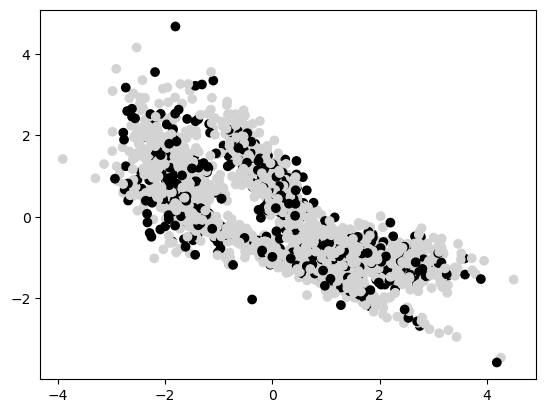

In [418]:
import matplotlib.pyplot as plt
color = ['black' if c == 0 else 'lightgrey' for c in y]
plt.scatter(X_train[:,0], X_train[:,1], c=color)

In [419]:
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2.5, 2.5)
yy = a * xx - (model.intercept_[0]) / w[1]
 

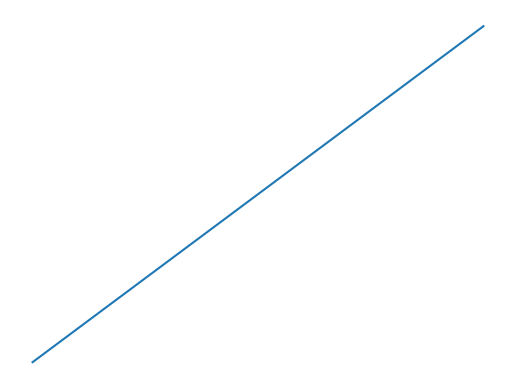

In [420]:
 
# Plot the hyperplane
plt.plot(xx, yy)
plt.axis("off"), plt.show();